# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

In [3]:
!pip install gensim tensorflow tensorflow-hub keras ollama langchain langchain_community langchain_core beautifulsoup4 chromadb gradio

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

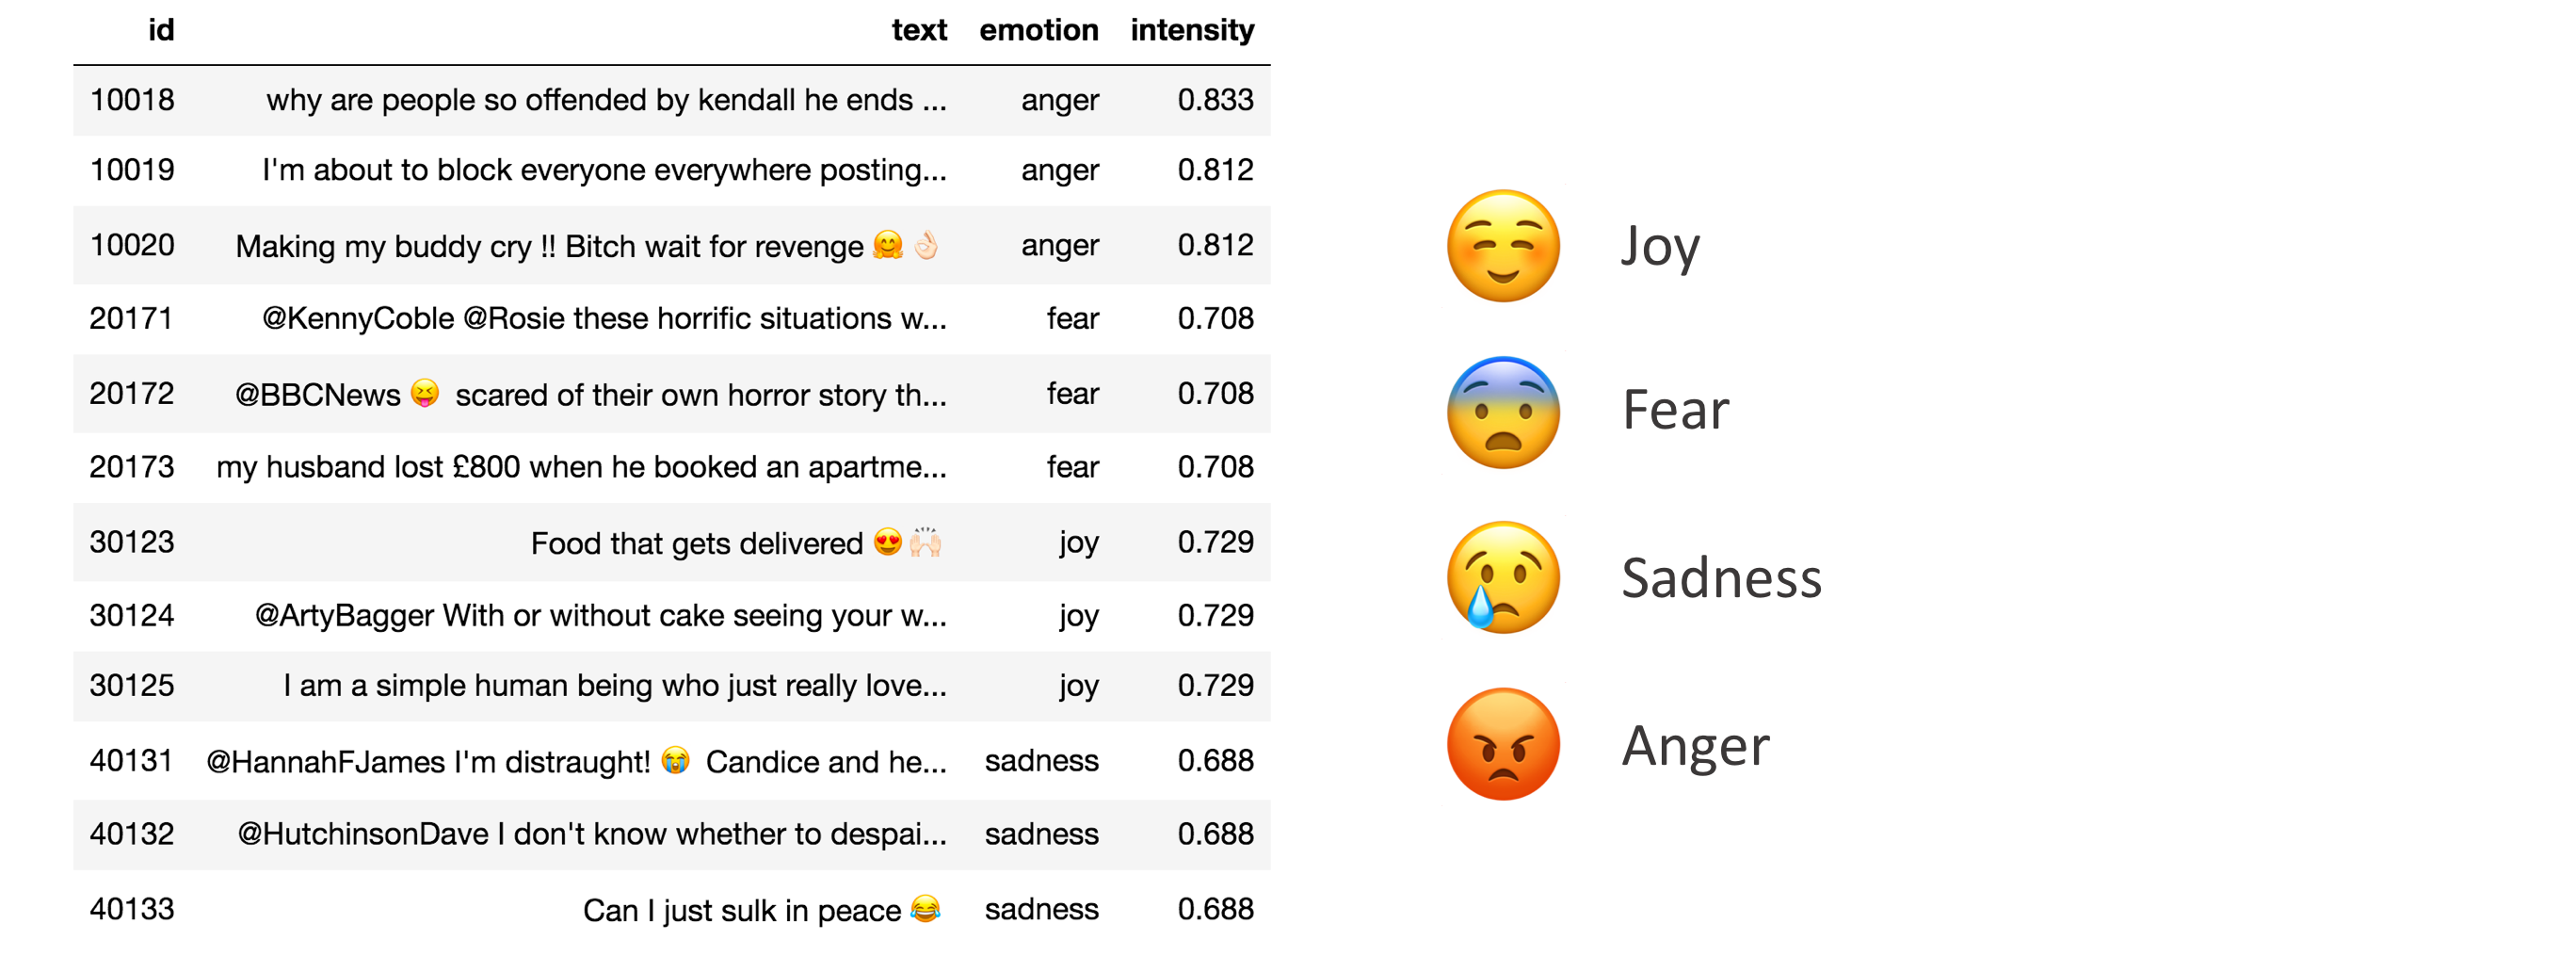

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [4]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [9]:
test_df.head()

id                                               text emotion  \
41   10898  Realest ever, relentless ever, inevitable that...   anger   
125  21188  But I was so intrigued by your style, boy.Alwa...    fear   
7    10864  My eyes have been dilated. I hate the world ri...   anger   
93   21156  There goes the butterflies in my stomach. #ner...    fear   
165  21228                            Northampton are awful 🙈    fear   

     intensity  
41       0.415  
125      0.292  
7        0.812  
93       0.812  
165      0.500

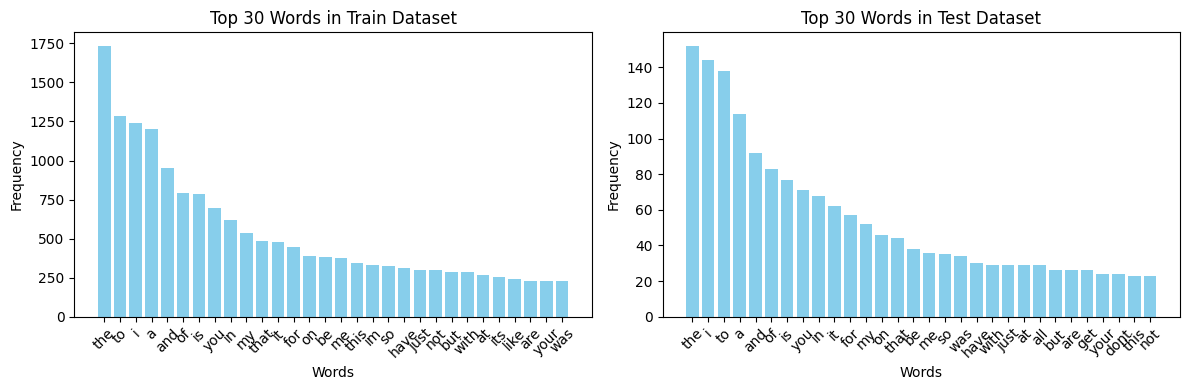

In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

def preprocess_text(text):
  # Remove punctuation, convert to lowercase
  text = re.sub(r'[^\w\s]', '', text.lower())
  return text.split()

def count_words(dataframe, column='text'):
  words = []
  for text in dataframe[column]:
    words.extend(preprocess_text(text))
  return Counter(words)

# Train dataset word frequencies
train_word_counter = count_words(train_df)
train_top_words = train_word_counter.most_common(30)
# Test dataset word frequencies
test_word_counter = count_words(test_df)
test_top_words = test_word_counter.most_common(30)

train_top_words_df = pd.DataFrame(train_top_words, columns=['Word', 'Frequency'])
test_top_words_df = pd.DataFrame(test_top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.bar(train_top_words_df['Word'], train_top_words_df['Frequency'], color='skyblue')
plt.title('Top 30 Words in Train Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2) 
plt.bar(test_top_words_df['Word'], test_top_words_df['Frequency'], color='skyblue')
plt.title('Top 30 Words in Test Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [15]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [16]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [17]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

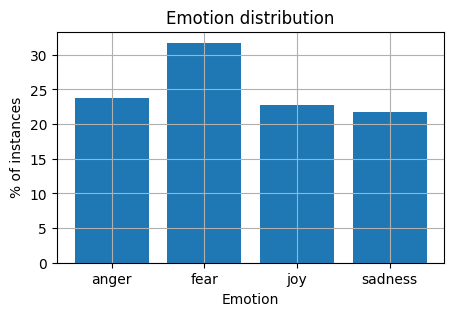

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [21]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [22]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [23]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [24]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [26]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [27]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [28]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\a0916\.conda\envs\dm\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [29]:
train_data_BOW_features_500.toarray()

array([[ 0, 13,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  3,  0, ...,  0,  0,  0]], dtype=int64)

In [30]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [31]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

print(train_data_TFIDF_features_1000.shape)

# observe some feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]


(3613, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'anger', 'fear', 'fear', 'anger', 'fear', 'anger',
       'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [40]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [41]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [42]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

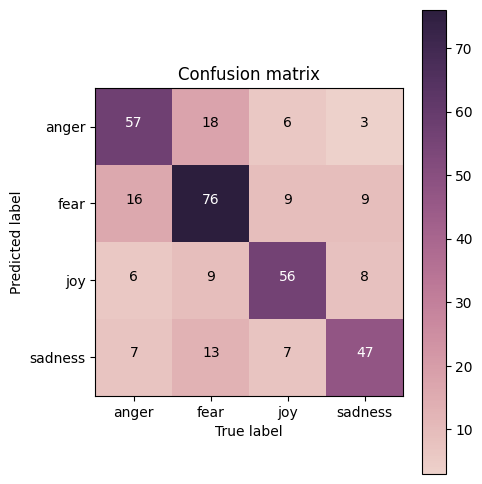

In [43]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### #Answer here

The confusion matrix visualizes the performance of the Decision Tree model on the classification task
    Diagonal values     : These represent correct predictions, where the predicted label matches the true label
    Off-diagonal values : These indicate misclassifications

    
Observations:
    The model performs well on fear (highest correct predictions of 76).
    Misclassifications seem more frequent for classes on anger and sadness, as their true values are confused with fear.

    
Conclusion: 
    The model likely captures dominant patterns in some classes (e.g., fear) but struggles with overlapping features in others.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes training accuracy: 0.79
Naive Bayes testing accuracy: 0.70
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



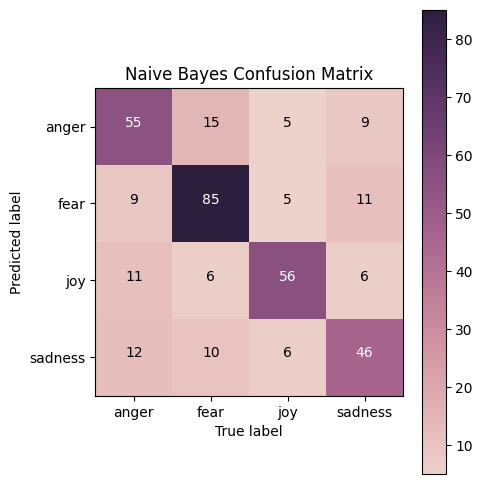

In [44]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Build Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('Naive Bayes training accuracy: {:.2f}'.format(acc_train))
print('Naive Bayes testing accuracy: {:.2f}'.format(acc_test))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

# plot confusion matrix
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### #Answer here

Naive Bayes generalizes better with a testing accuracy of 0.70 compared to Decision Tree’s 0.68, despite lower training accuracy (0.79 vs. 0.99).

Naive Bayes avoids overfitting due to its simplicity and independence assumptions, while Decision Trees overfit by memorizing the training data. 

Theoretical Explanation of Differences:

    Decision Trees:
        Decision Trees split the feature space based on information gain or similar criteria, which allows them to fit complex patterns but risks overfitting, especially without regularization (e.g., limiting tree depth or pruning).
        The high training accuracy and slight drop in testing accuracy highlight this overfitting.
        
    Naive Bayes:
        Naive Bayes uses Bayes' Theorem with the assumption that all features are conditionally independent given the target label. While this assumption rarely holds in real-world data, it reduces model complexity, improving generalization and making it less sensitive to noise.
    
The differences underscore the trade-off between model complexity and generalization. Naive Bayes thrives under the simplicity of its assumptions, while Decision Trees require careful tuning to balance flexibility and robustness.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

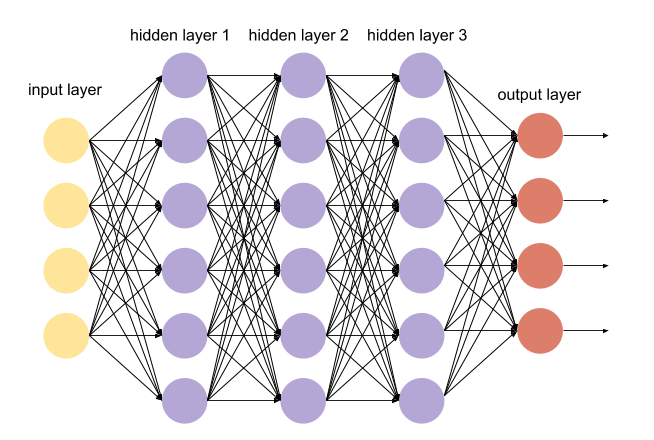

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [45]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
import keras

In [46]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [47]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3       anger
2475      joy
1387     fear
610     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [48]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


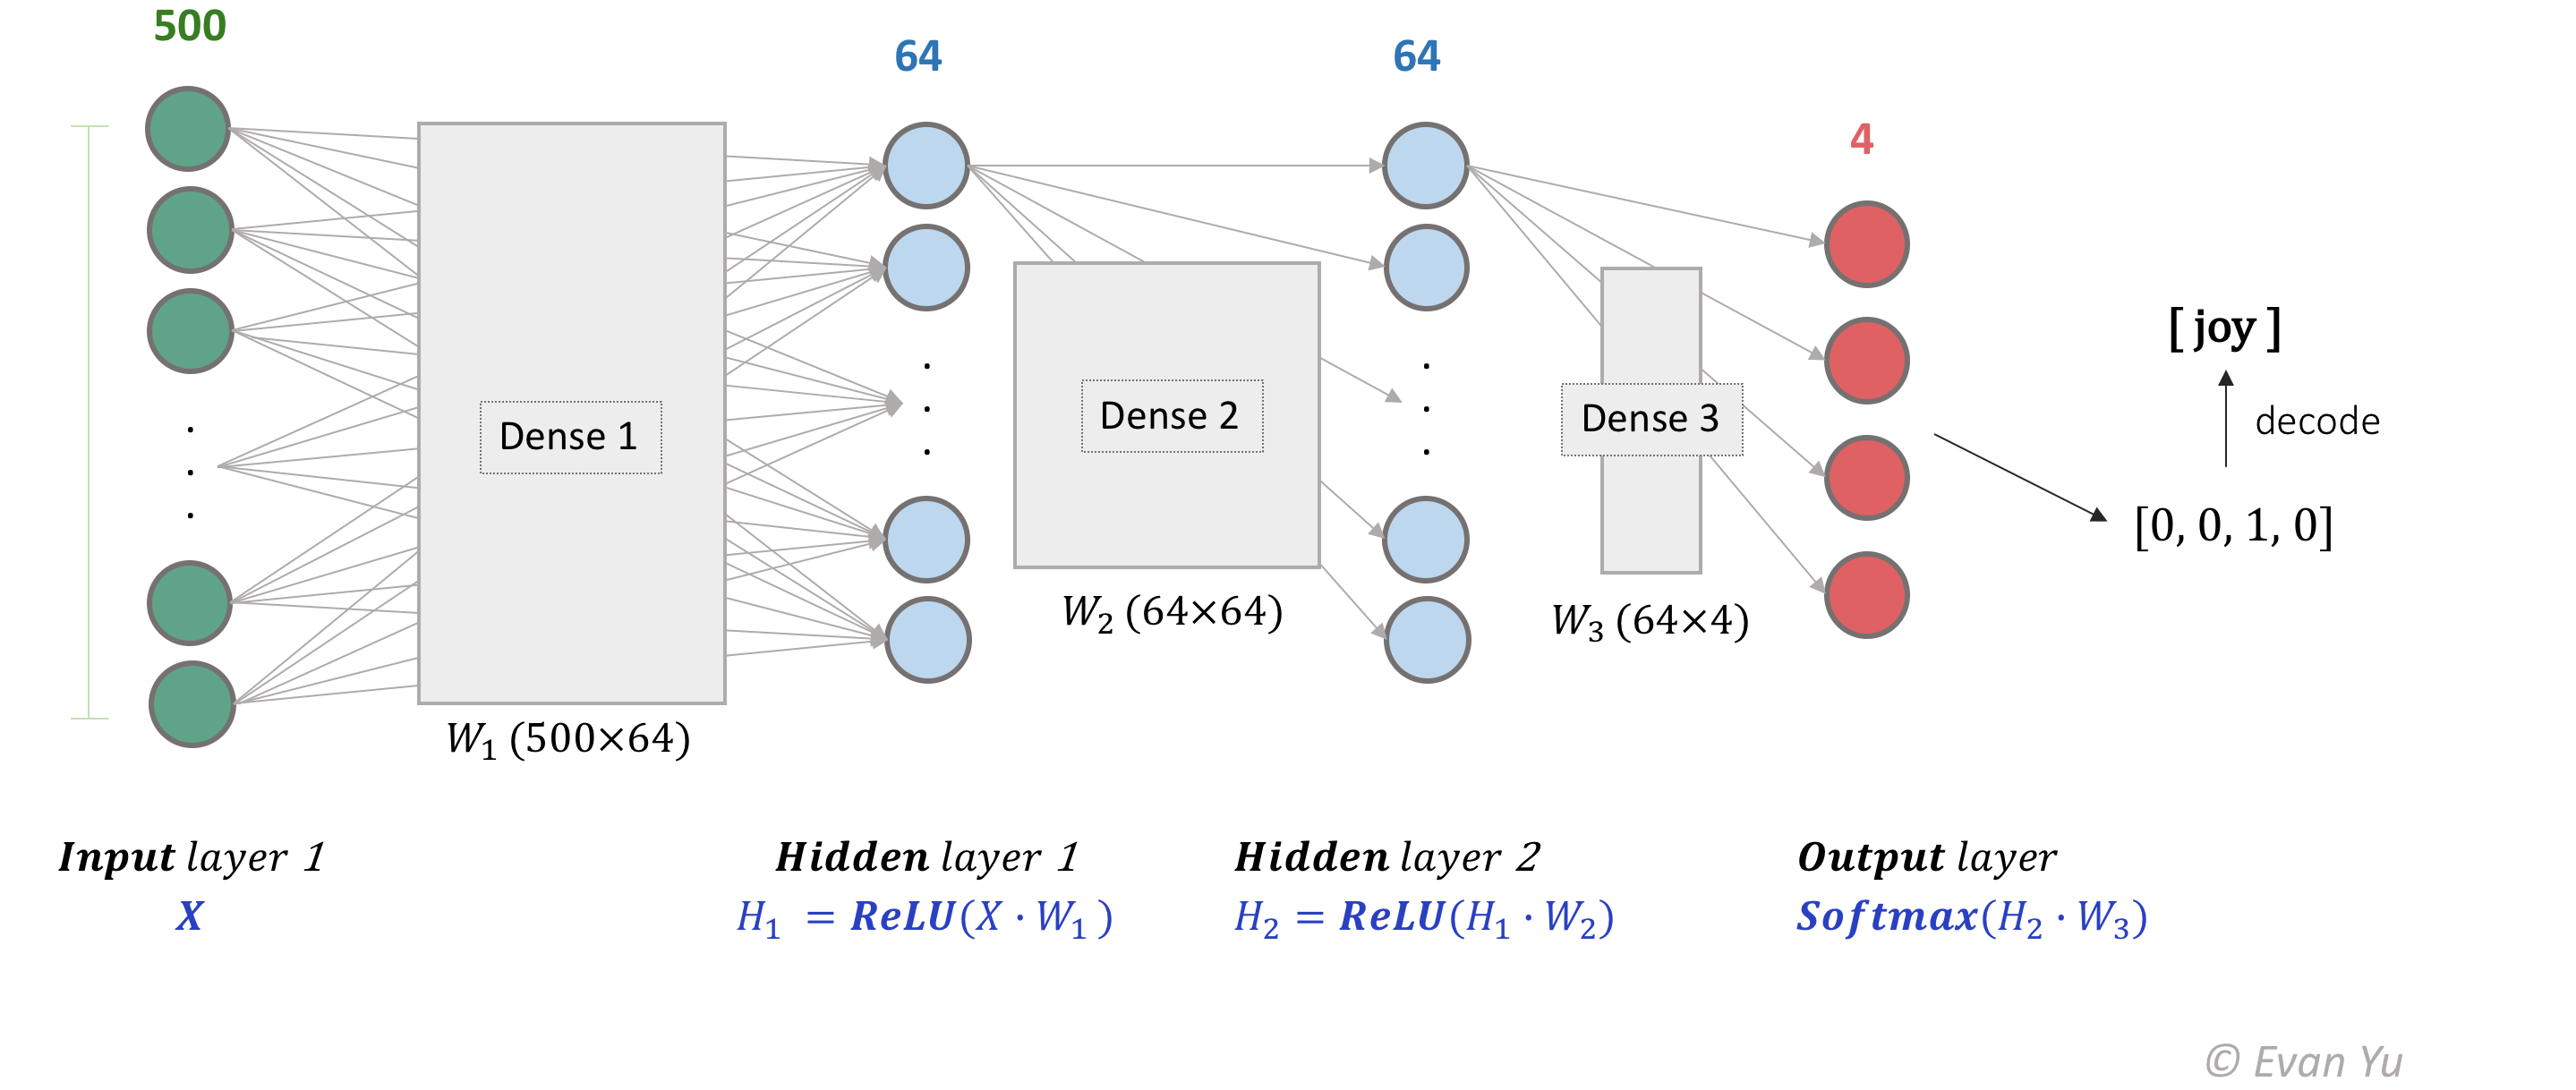

In [49]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [50]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\a0916\.conda\envs\dm\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3120 - loss: 1.3580 - val_accuracy: 0.4640 - val_loss: 1.2667
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6410 - loss: 1.0603 - val_accuracy: 0.6830 - val_loss: 0.8985
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7952 - loss: 0.5916 - val_accuracy: 0.7118 - val_loss: 0.7857
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.4094 - val_accuracy: 0.7032 - val_loss: 0.8031
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8873 - loss: 0.3225 - val_accuracy: 0.6945 - val_loss: 0.8300
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.2549 - val_accuracy: 0.6744 - val_loss: 0.9186
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9355 - loss: 0.2078 - val_accuracy: 0.6801 - val_loss: 0.9375
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9496 - loss: 0.1781 - val_accuracy: 0.6686 - val_

### 6.5 Predict on testing data

In [51]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[9.99334037e-01, 2.12455379e-05, 2.26840602e-05, 6.22085878e-04],
       [6.96767675e-05, 9.99926805e-01, 1.44042716e-08, 3.49079255e-06],
       [9.99999881e-01, 2.89834094e-11, 1.60030897e-13, 7.75281066e-08],
       [1.95193861e-05, 9.99941230e-01, 4.10617275e-07, 3.89029155e-05],
       [8.47631309e-05, 9.99634385e-01, 2.29517929e-04, 5.14126114e-05]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'anger', 'fear', 'fear'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.372267  1.318447      0.463977  1.266714
1       1  0.670357  0.956024      0.682997  0.898513
2       2  0.794354  0.572455      0.711816  0.785704
3       3  0.853307  0.413736      0.703170  0.803122
4       4  0.882646  0.326573      0.694524  0.829982
5       5  0.907833  0.274056      0.674352  0.918621
6       6  0.925547  0.225220      0.680115  0.937531
7       7  0.933296  0.197779      0.668588  1.004691
8       8  0.948519  0.163761      0.682997  1.076704
9       9  0.953778  0.148830      0.677233  1.126529
10     10  0.963742  0.126705      0.677233  1.138581
11     11  0.966233  0.115785      0.688761  1.209686
12     12  0.968171  0.109226      0.659942  1.289740
13     13  0.969831  0.102296      0.657061  1.307701
14     14  0.967340  0.100114      0.659942  1.376474
15     15  0.972045  0.092256      0.694524  1.351513
16     16  0.971492  0.087330      0.659942  1.429787
17     17  0.975090  0.085649      0.680115  1.448326
18     18  0.975367  0.078405      0.668588  1.511227
19     19  0.974536  0.082715      0.662824  1.494564
20     20  0.975367  0.075134      0.662824  1.530698
21     21  0.976751  0.069038      0.662824  1.605770
22     22  0.976751  0.069281      0.674352  1.522398
23     23  0.977581  0.066288      0.665706  1.614249
24     24  0.976751  0.072347      0.659942  1.618943

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

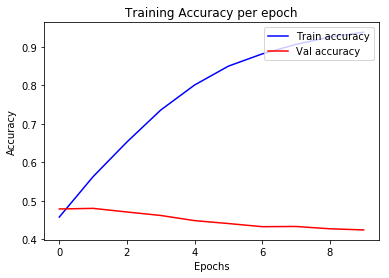


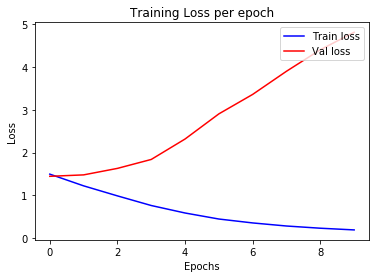

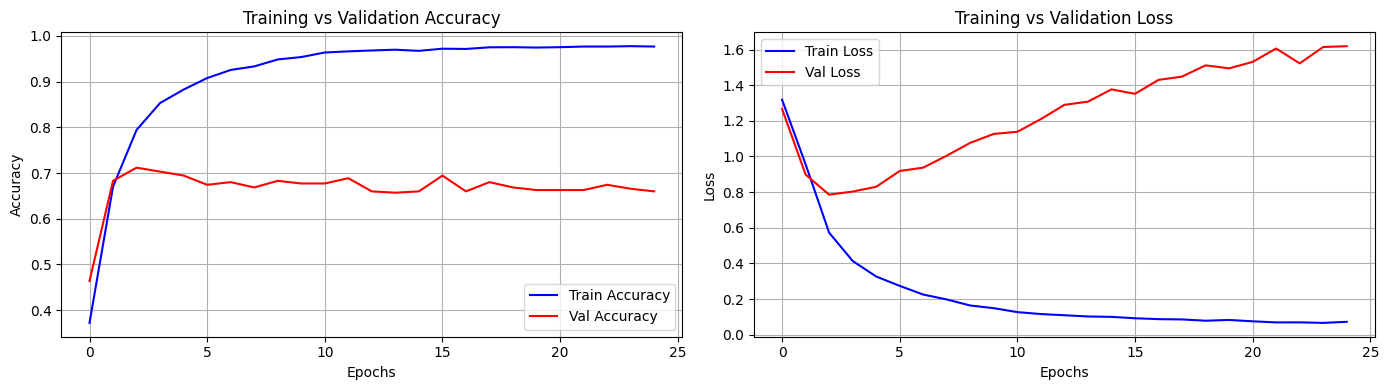

In [57]:
# Answer here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))  # Create 1 row, 2 columns

# Plot Accuracy
ax1.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training vs Validation Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(training_log['epoch'], training_log['loss'], label='Train Loss', color='blue')
ax2.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss', color='red')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training vs Validation Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout() 
plt.show()

The presented training and validation accuracy/loss curves indicate a clear case of overfitting. 

The model demonstrates high performance on the training data, but its performance on the validation data plateaus and even deteriorates after a certain number of epochs. 

This suggests that the model has become overly complex and has begun to memorize the training data rather than learning generalizable patterns.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [58]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
3     10003  so ef whichever butt wipe pulled the fire alar...   
2475  30471  @DipstickDipper \n'It's alright!' She said che...   
1387  20530  @jk_rowling never thought an angry oompa loomp...   
610   10610  Love how Megan is raging about this Kendall Je...   
357   10357  @girlsreallyrule Both Trump + King are relentl...   

                                         text_tokenized  
3     [so, ef, whichever, butt, wipe, pulled, the, f...  
2475  [@, DipstickDipper, \n'It, 's, alright, !, ', ...  
1387  [@, jk_rowling, never, thought, an, angry, oom...  
610   [Love, how, Megan, is, raging, about, this, Ke...  
357   [@, girlsreallyrule, Both, Trump, +, King, are...

In [59]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['so', 'ef', 'whichever', 'butt', 'wipe', 'pulled', 'the', 'fire', 'alarm', 'in', 'davis', 'bc', 'I', 'was', 'sound', 'asleep', '#', 'pissed', '#', 'angry', '#', 'upset', '#', 'tired', '#', 'sad', '#', 'tired', '#', 'hangry', '#', '#', '#', '#', '#', '#']),
       list(['@', 'DipstickDipper', "\\n'It", "'s", 'alright', '!', "'", 'She', 'said', 'cheerfully', 'trying', 'to', 'make', 'the', 'moment', 'fun']),
       list(['@', 'jk_rowling', 'never', 'thought', 'an', 'angry', 'oompa', 'loompa', 'would', 'be', 'my', 'Boggart', ',', 'but', 'there', 'you', 'have', 'it', '.', '#', 'boggart', '#', 'PresidentTrump'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [60]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [61]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.14716287,  0.19647527,  0.11691178, -0.20930958, -0.40280518,
       -0.73337924,  0.7968668 ,  1.1501898 , -0.18376239, -0.4807962 ,
       -0.6248156 , -0.52886975, -0.4346823 ,  0.2948976 , -0.26831508,
       -0.38195798,  0.02276341, -0.56078583,  0.05169292, -1.3735535 ,
        0.8000543 ,  0.6745816 ,  0.3885394 ,  0.01652992,  0.22908446,
        0.3984098 , -0.76148105,  0.55482066, -0.46282372,  0.17903256,
        0.32729736,  0.28603688,  0.9154208 , -0.90684646, -0.19738284,
        0.45591274,  0.2951359 ,  0.13930668, -0.5298825 , -0.607596  ,
       -0.20006913, -0.33354646, -0.45826602, -0.12378678,  0.9502009 ,
       -0.30334225, -0.85259026,  0.15487228,  0.42991787,  0.5023125 ,
        0.02947738, -0.51746845, -0.16483669, -0.3963869 , -0.66355366,
       -0.23448633,  0.32570145, -0.18022029, -0.14511883,  0.08743879,
        0.06877748, -0.34905508,  0.3473249 ,  0.53992873, -0.67049986,
        0.8812145 , -0.16037057,  0.6342393 , -1.0414661 ,  0.62

In [62]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9263131022453308),
 ('Be', 0.9177602529525757),
 ('blessed', 0.913383424282074),
 ('TheNiceBot', 0.9112698435783386),
 ('depress', 0.9065373539924622),
 ('help', 0.9061512351036072),
 ('Kik', 0.9032049775123596),
 ('nuclear', 0.8998189568519592),
 ('right', 0.8985856175422668),
 ('missiles.\\n\\n', 0.8978456258773804)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [63]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [64]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### # Answer here
1. Averaging Word Vectors : Compute the vector for each word in the sentence using the Word2Vec model. Take the average of all word vectors in the sentence to produce a single vector representing the sentence.
2. Concatenating or Pooling Word Vectors : Instead of averaging, concatenate or pool word vectors (ex. max, min pooling)
3. Weighted Word Vectors : Combine the word vectors using weights derived from Term Frequency-Inverse Document Frequency (TF-IDF).

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [66]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [68]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


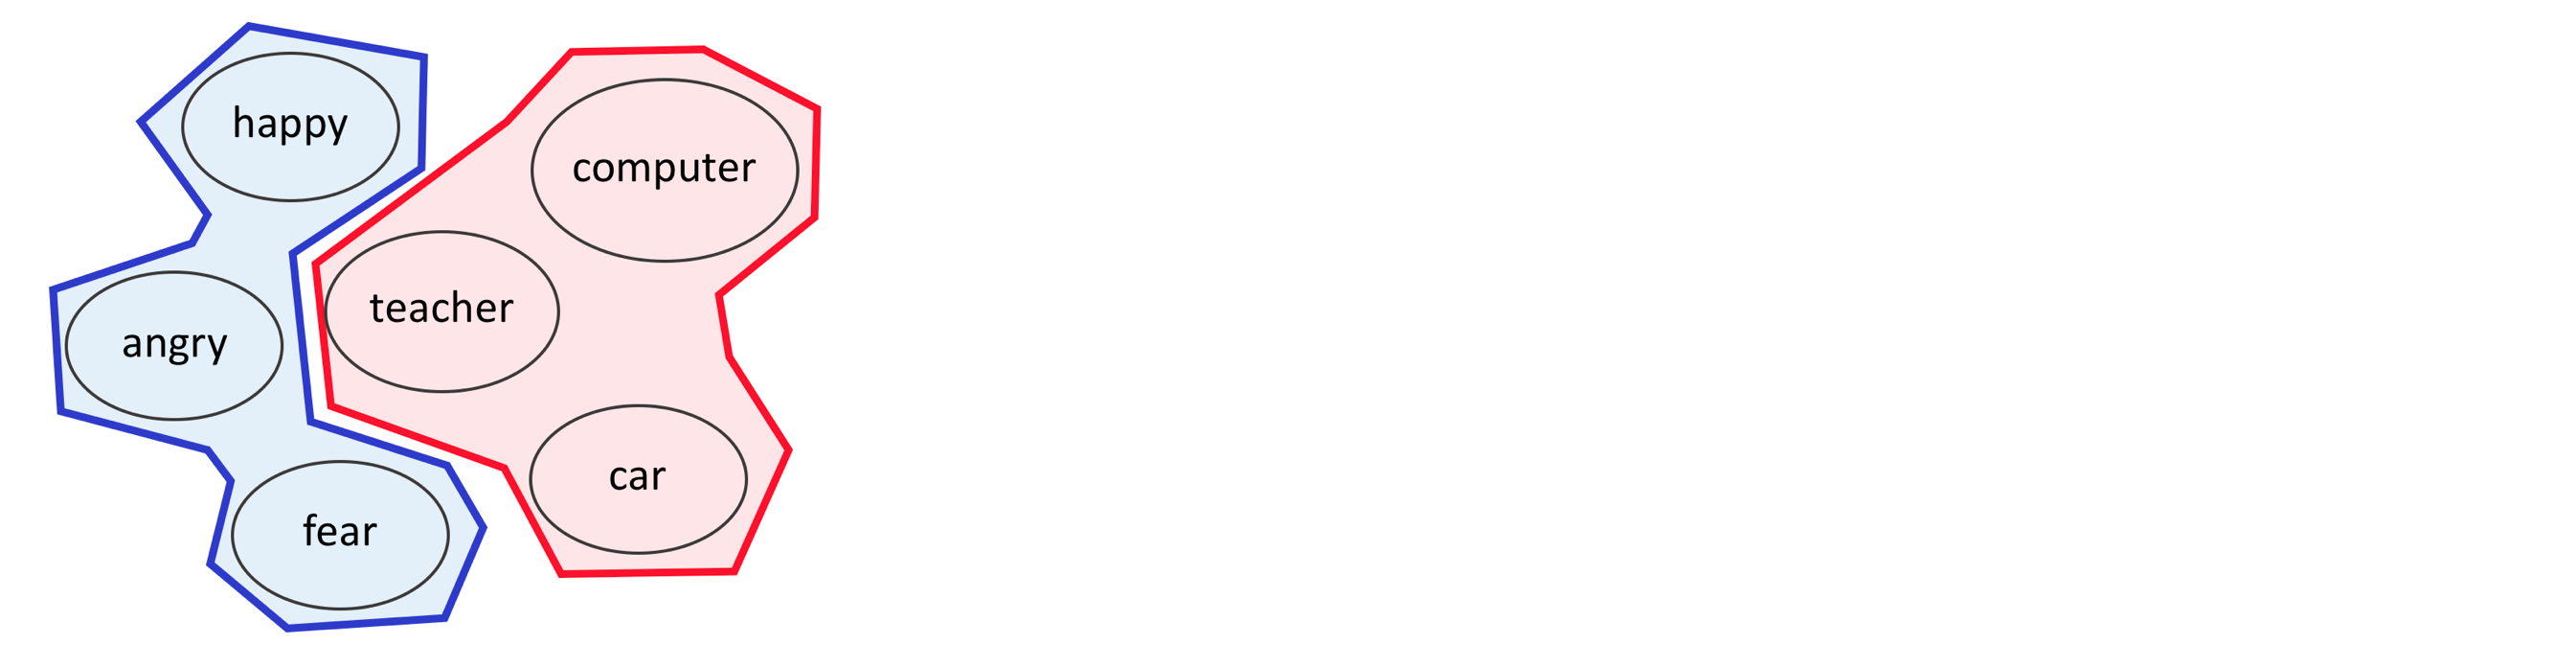

In [70]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [71]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

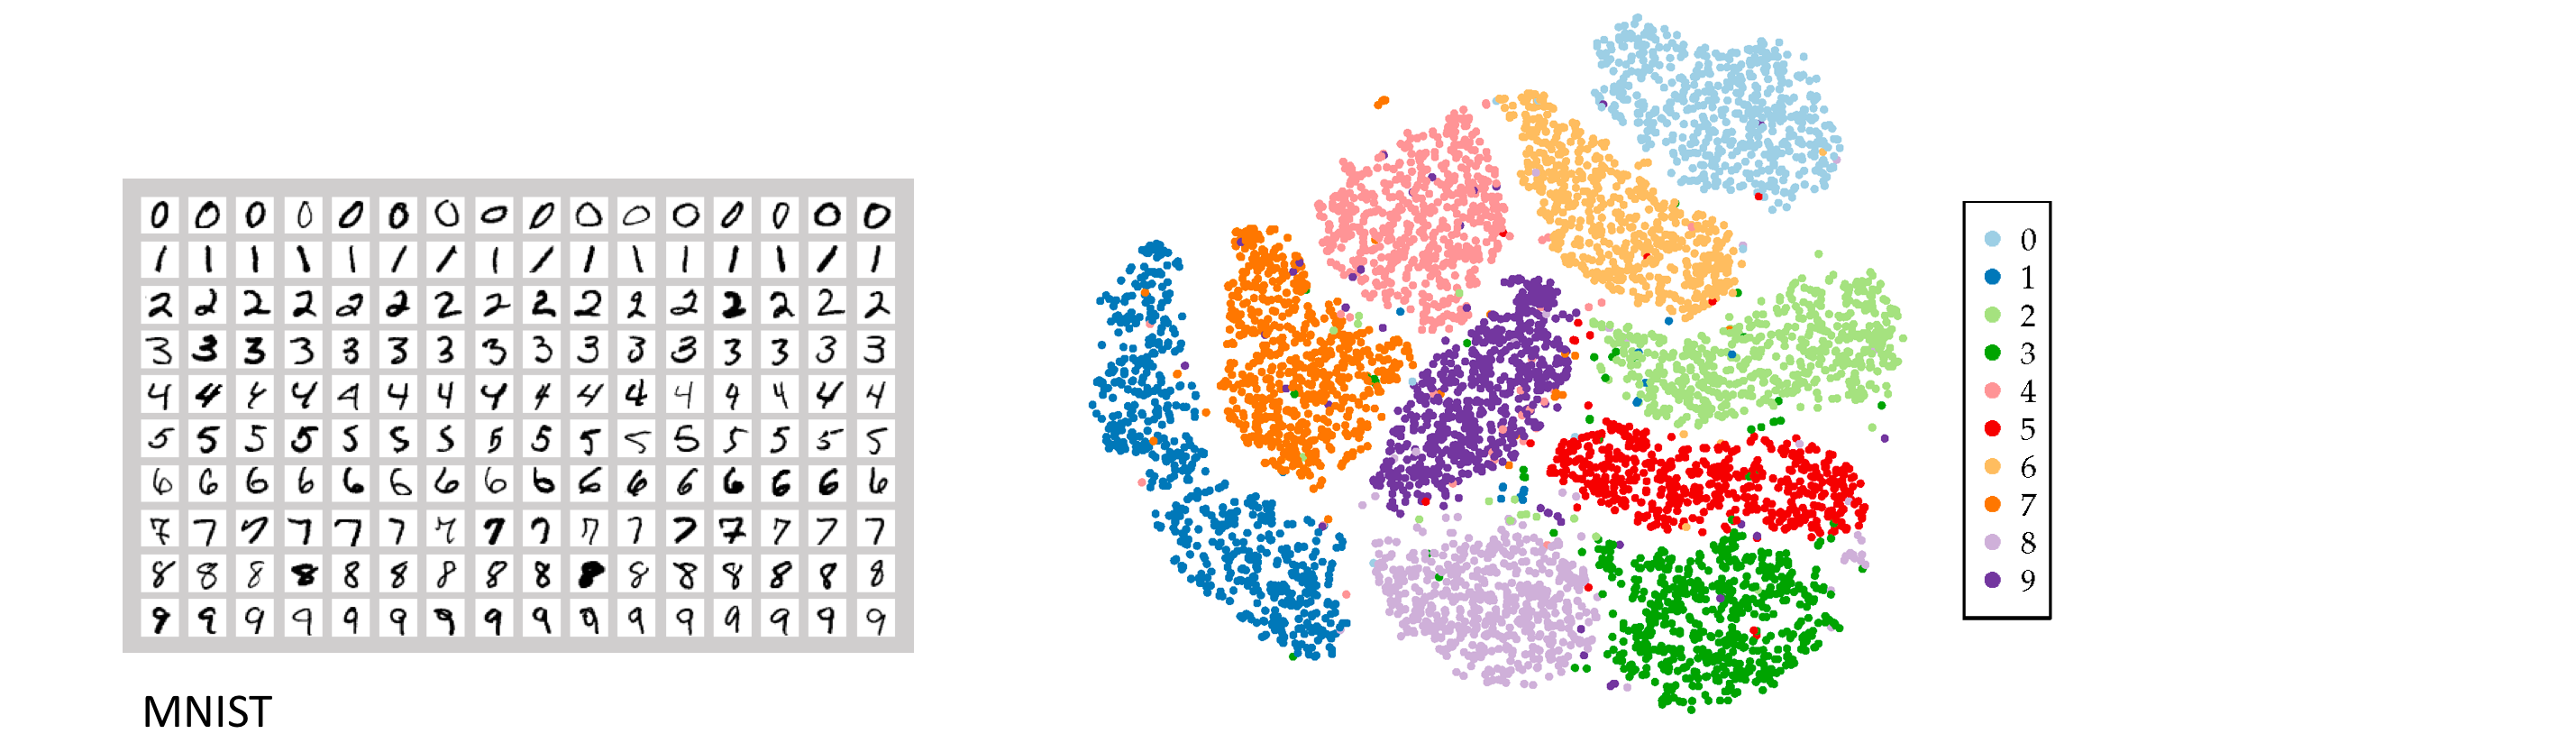

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:
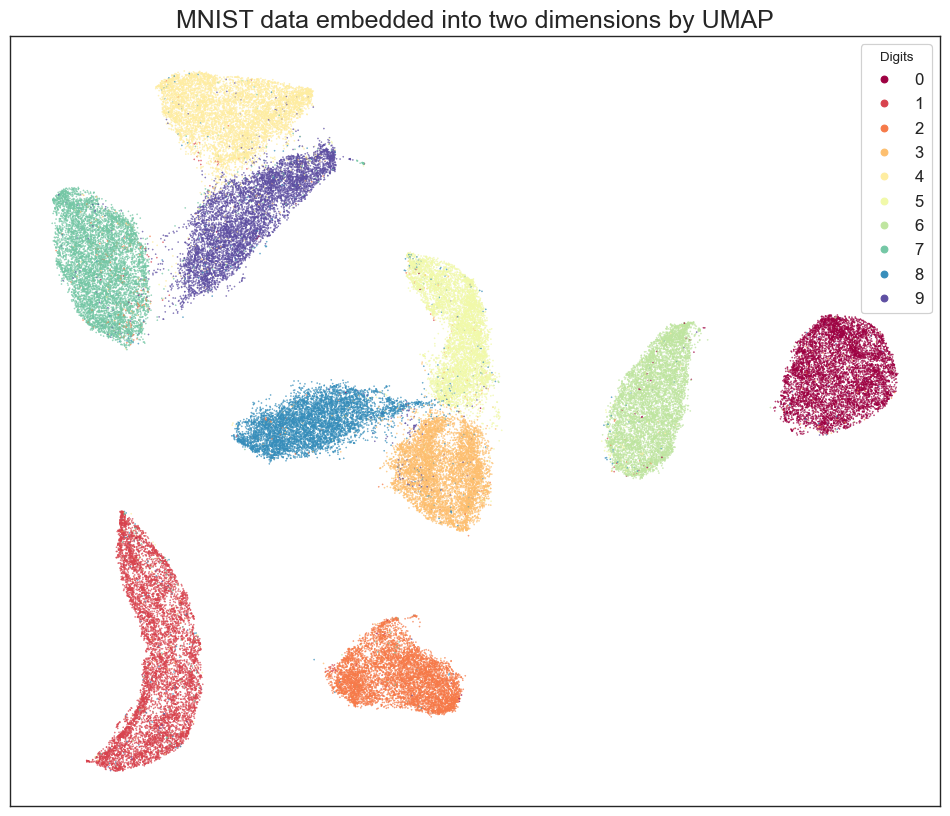

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [72]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

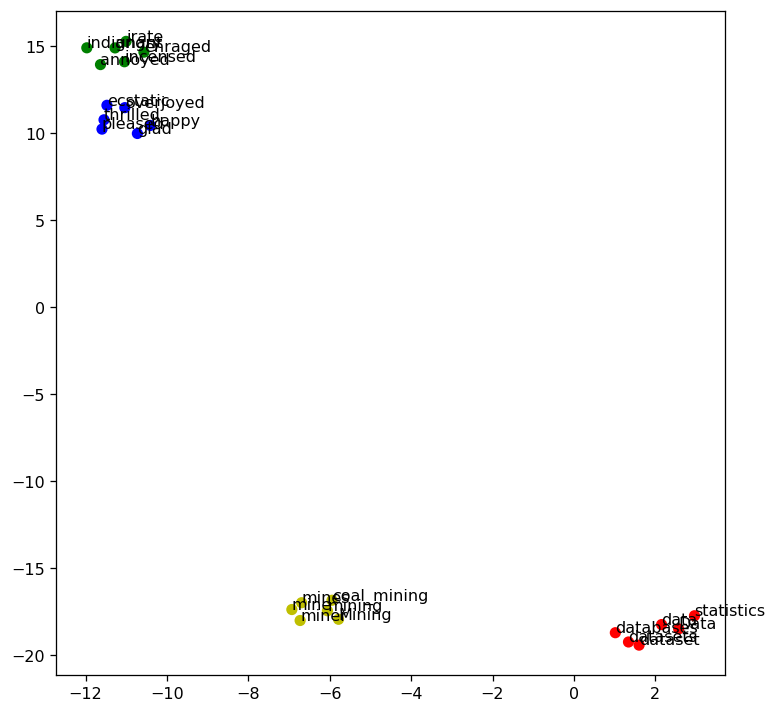

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

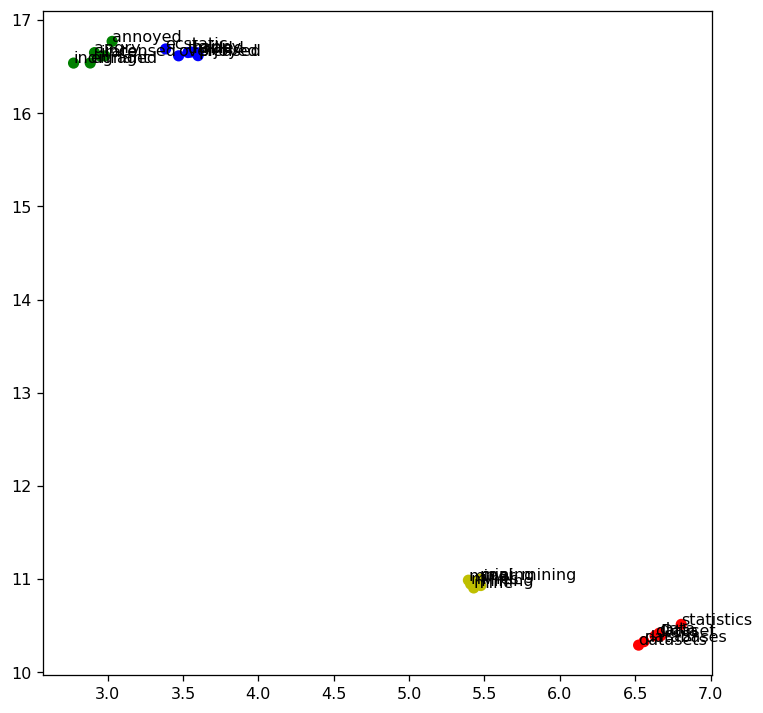

In [74]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

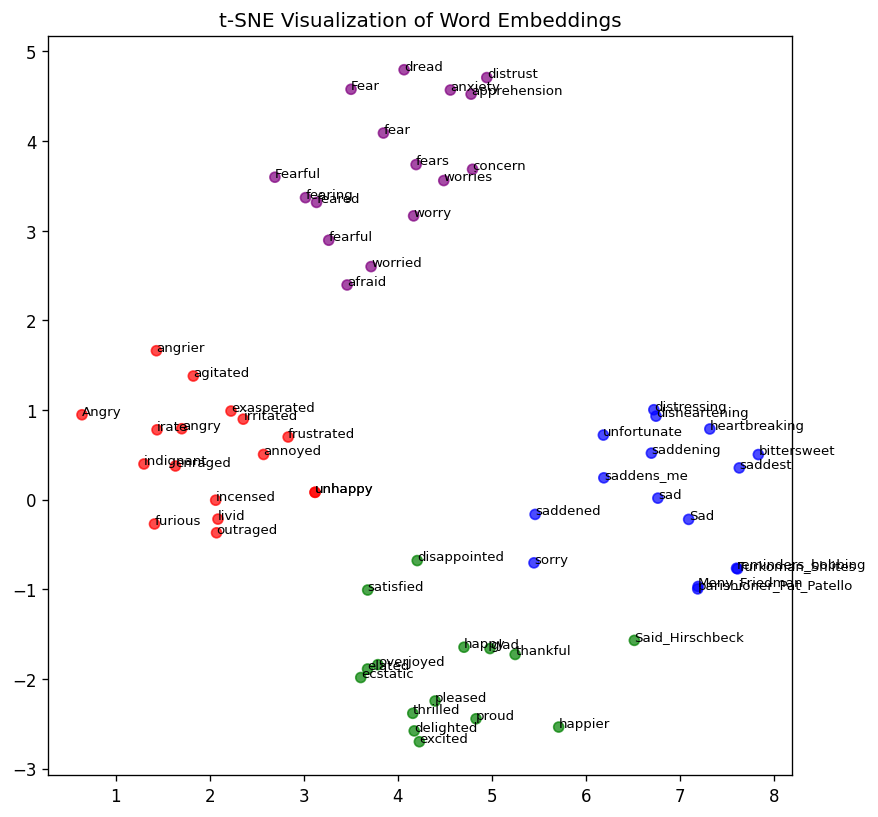

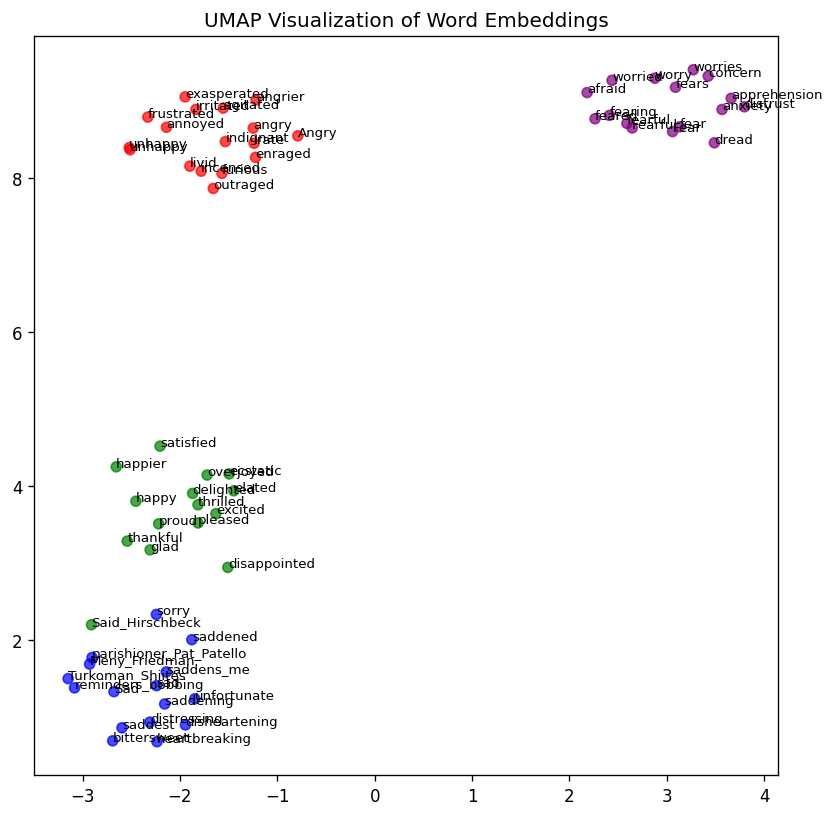

In [77]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Step 1: Find most related words for each emotion
target_words = ["angry", "happy", "sad", "fear"]
related_words = {}
num_related = 15

for word in target_words:
    related_words[word] = [item[0] for item in w2v_google_model.most_similar(word, topn=num_related)]

all_words = []
for word, related in related_words.items():
    all_words.extend([word] + related)

# Step 2: Extract embeddings
X_train = w2v_google_model[all_words]

# Step 3: t-SNE & UMAP
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

color_map = {
    "angry": "red",
    "happy": "green",
    "sad": "blue",
    "fear": "purple",
}
colors = []
for word in all_words:
    for emotion in target_words:
        if word in [emotion] + related_words[emotion]:
            colors.append(color_map[emotion])
            break

# Step 4: Plot
def plot_embeddings(X, title, labels):
    plt.figure(figsize=(8, 8), dpi=120)
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7)
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
    plt.title(title)
    plt.show()

plot_embeddings(X_tsne, "t-SNE Visualization of Word Embeddings", all_words)
plot_embeddings(X_umap, "UMAP Visualization of Word Embeddings", all_words)


t-SNE provides a more dispersed and evenly spaced layout, preserving relative distances between words and minimizing overlap. This can be beneficial for visualizing broader semantic relationships and identifying potential outliers.

UMAP produces a more compact and clustered visualization, particularly for emotion-related words. This can be useful for identifying specific clusters of semantically similar words and understanding finer-grained relationships within those clusters.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
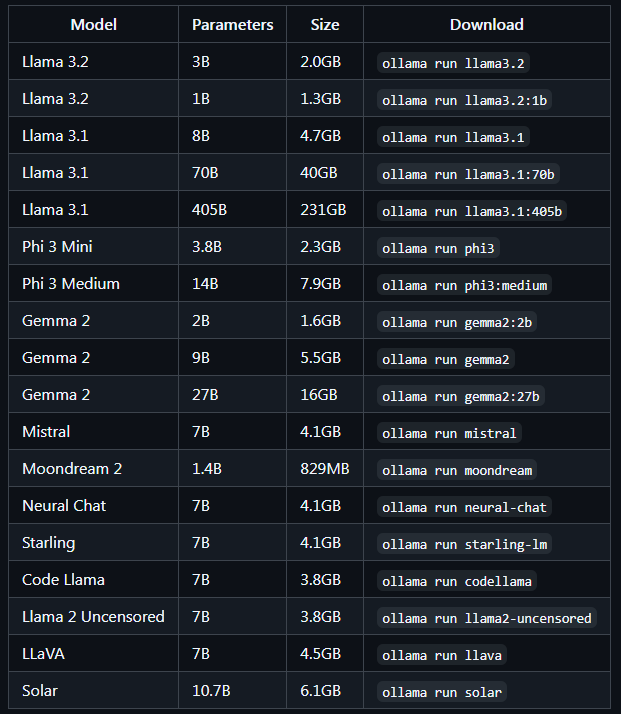

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [78]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract valuable information from raw data.

### Goals

* Identify relevant patterns or trends in data
* Extract meaningful insights and knowledge
* Support business decision-making with data-driven recommendations

### Types of Data Mining

* **Descriptive Data Mining**: Identifying patterns and relationships in historical data.
* **Diagnostic Data Mining**: Analyzing data to diagnose problems or identify causes of issues.
* **Predictive Data Mining**: Using models to forecast future events or outcomes.
* **Prescriptive Data Mining**: Recommending actions based on analysis of data.

### Techniques Used in Data Mining

* **Machine Learning**: Training algorithms on data to make predictions or recommendations.
* **Decision Trees**: Creating tree-like models to identify patt

**We can use the IPython library to make the response look better:**

In [79]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [80]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract valuable information from raw data.

### Goals

* Identify relevant patterns or trends in data
* Extract meaningful insights and knowledge
* Support business decision-making with data-driven recommendations

### Types of Data Mining

* **Descriptive Data Mining**: Identifying patterns and relationships in historical data.
* **Diagnostic Data Mining**: Analyzing data to diagnose problems or identify causes of issues.
* **Predictive Data Mining**: Using models to forecast future events or outcomes.
* **Prescriptive Data Mining**: Recommending actions based on analysis of data.

### Techniques Used in Data Mining

* **Machine Learning**: Training algorithms on data to make predictions or recommendations.
* **Decision Trees**: Creating tree-like models to identify patterns and relationships.
* **Clustering**: Grouping similar data points together.
* **Regression Analysis**: Modeling the relationship between variables.
* **Text Analysis**: Analyzing text data to extract insights.

### Applications of Data Mining

* **Marketing**: Personalized product recommendations, customer segmentation.
* **Finance**: Risk assessment, portfolio optimization.
* **Healthcare**: Disease diagnosis, patient outcome prediction.
* **Retail**: Demand forecasting, supply chain optimization.
* **Sports**: Player performance analysis, game strategy optimization.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

#### #Answer here
    user      : The person interacting with the model.
    assistant : The AI model responding to the user.
    system    : Guidelines or instructions for the model's behavior.
    
Example : Use the system role instructs the assistant to behave as a machine learning expert and provide concise responses in markdown format.

In [81]:
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are an expert in machine learning and data science. Respond concisely and in markdown format.'
    },
    {
        'role': 'user',
        'content': 'What is data mining?'
    }
])

print(response['message']['content'])


**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets using various statistical and mathematical techniques.

**Key Characteristics:**

*   **Large datasets**: Typically involving millions or billions of records.
*   **Automated discovery**: Uses algorithms to identify hidden patterns and relationships.
*   **Pattern extraction**: Focuses on extracting meaningful patterns and rules from the data.

**Common Applications:**

*   Customer segmentation
*   Predictive modeling
*   Recommendation systems
*   Data warehousing

**Example Use Cases:**

*   Identifying customer churn in telecommunications companies
*   Detecting credit card fraud using transactional data
*   Building personalized product recommendations for e-commerce websites


### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

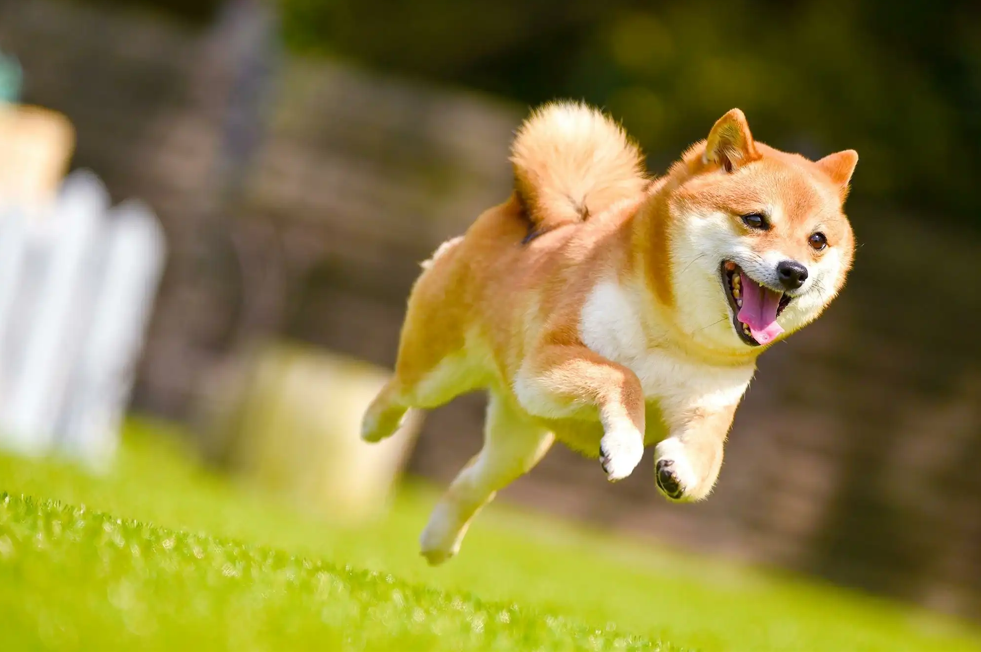
source: https://cooljapan-videos.com/tw/articles/epe0y86g

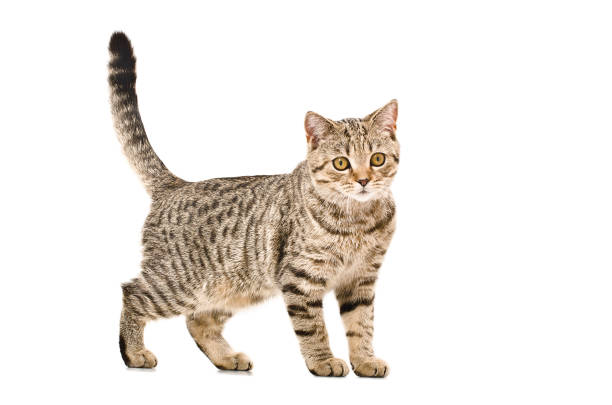
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [82]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the image, a Shiba Inu dog is captured in mid-air, full of energy and excitement. The dog's fur is predominantly orange with white markings on its face and legs, giving it a vibrant appearance. Its tail is curved upwards, adding to its playful demeanor.

The Shiba Inu is leaping off the ground, front paws extended forward in an impressive display of agility. It's moving from left to right across the image, creating a dynamic sense of motion.

The setting appears to be a park or garden with lush green grass underfoot and trees in the background. The focus is on the dog, but these details suggest a peaceful outdoor environment where this joyful scene takes place. There's no text present in the image. The relative position of the objects places the dog as the central figure against a serene backdrop.

In [83]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))


The image features a single, adult gray tabby cat with striking green eyes. The cat is standing on its hind legs, facing the camera directly. Its tail is held up in an alert position. The cat's front paws are gently resting against its body, suggesting it might be ready to jump or play. The background of the image is a stark white, which contrasts with the gray of the cat and helps it stand out. There are no other objects or text in the image. The cat appears to be the sole focus of this photo.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

##### While the description is generally accurate, it falls short of identifying the specific character depicted as Usagi from the popular anime series 'Chiikawa.' 
##### The image clearly features Usagi's distinctive design, including the large, expressive eyes and the signature pink accents. 
##### The spiral structure and Japanese speech bubbles further contextualize the image within the 'Chiikawa' universe. 
##### The description accurately captures the whimsical and playful nature of the scene, but the omission of Usagi's specific identity is a notable oversight.

<img src="./pics/usagi_tornado.jpg" width="200" height="200">

In [84]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/usagi_tornado.jpg']
    },
])

display(Markdown(response3['message']['content']))


This image features a whimsical scene set against a vibrant yellow background. The main character is a white cat-like creature with pink cheeks and chest, giving it an endearing appearance. It has large eyes that are full of curiosity and joy, as indicated by the small black pupils. 

The creature is not standing upright but rather sitting in an unusual manner on top of a spiral. The spiral appears to be made of white paper or cloth, adding an element of playfulness to the image. 

Adding to the fun are three speech bubbles that surround the creature. These bubbles contain Japanese text which reads "こんにちは" (Konnichiwa), "おはよう" (Ohayou), and "こんばんは" (Konbanwa). The first two expressions translate to "Hello" and "Good morning", while the last one means "Good evening". 

The relative positions of the objects suggest a lively interaction. The speech bubbles are not just randomly placed; they seem to be in close proximity to the creature, indicating that it is engaging with them. The spiral on which the creature sits also seems to be positioned between two of these bubbles.

Overall, this image creates a sense of humor and playfulness through its colorful characters and their interactions.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [85]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\a0916\AppData\Local\Temp\ipykernel_39520\3929822569.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


IBM has developed several related solutions with Large Language Models (LLMs) in various contexts:

1. **Watsonx AI**: IBM has launched its Granite model series on watsonx.ai, which serves as the generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. **Watsonx Assistant**: This is an AI-powered chatbot that leverages LLMs to provide conversational interfaces for customers and businesses.
3. **Watsonx Orchestrate**: This platform utilizes LLMs to enable the automation of business processes and workflows, making it easier for organizations to integrate AI into their operations.

These solutions showcase IBM's efforts to harness the capabilities of LLMs to enhance natural language understanding (NLU) and natural language processing (NLP), as well as provide more efficient and cost-effective ways to adopt AI across various business functions and use cases.


### **Actual content in the URL:**
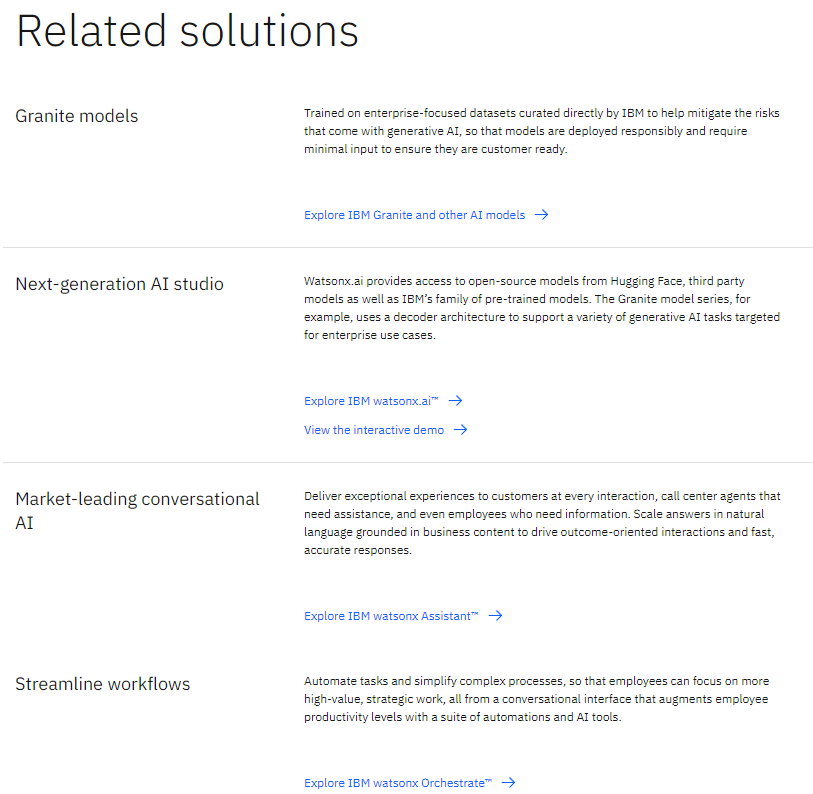

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

The evaluation of RAG-generated responses against the source document revealed a spectrum of accuracy. The response to the first query, "LLM Development Approach," demonstrated high fidelity to the original text, accurately capturing key strategies and maintaining a similar level of detail. The second query, "Challenges in AI Language Model Research," yielded a moderately accurate response, correctly identifying core challenges but exhibiting minor discrepancies in phrasing. The third query, "Applications Across Industries," resulted in a partially accurate response that, while aligning with the general themes of the source document, included additional elaborations not present in the original text.
- Pros:
    - More accurate answers
    - Less likely to make things up
- Cons:
    - Relies on the quality of the information it finds
    - Can sometimes misunderstand the information
    - Requires a lot of computing power

In [86]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(urls):
    combined_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL content
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)  # Split into chunks
        combined_splits.extend(splits)  # Combine chunks from all URLs
    
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=combined_splits, embedding=embeddings)
    return vectorstore.as_retriever()

# List of URLs
urls = [
    "https://ai.stanford.edu/research/large-language-models",
    "https://deepmind.com/blog/article/language-models-research",
    "https://aws.amazon.com/machine-learning/ai-services/"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format retrieved docs for context

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain with three questions
questions = [
    "How do research institutions approach large language model development?",
    "What are the key challenges in current AI language model research?",
    "Describe the potential applications of advanced language models across industries"
]

for question in questions:
    result = rag_chain(question)
    print(f"**Question:** {question}\n**Answer:** {result}\n")


**Question:** How do research institutions approach large language model development?
**Answer:** Research institutions approach large language model (LLM) development by adopting a multi-faceted approach that incorporates various techniques to improve model performance, accuracy, and reliability. Here are some key strategies they employ:

1. **Training on massive corpora**: LLMs are trained on enormous amounts of text data, typically in the billions of pages, to learn grammar, semantics, and conceptual relationships through zero-shot and self-supervised learning.
2. **Fine-tuning and prompt engineering**: Researchers fine-tune pre-trained LLMs on specific tasks or domains to adapt them to particular use cases. They also employ various techniques like prompt engineering, prompt-tuning, and reinforcement learning with human feedback (RLHF) to remove biases, hateful speech, and factually incorrect answers.
3. **Use of transformer models**: The architecture of LLMs is built around transfo

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [87]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [88]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [89]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [90]:
df_train #We can see the new column with the embeddings 

id                                               text  emotion  \
3     10003  so ef whichever butt wipe pulled the fire alar...    anger   
2475  30471  @DipstickDipper \n'It's alright!' She said che...      joy   
1387  20530  @jk_rowling never thought an angry oompa loomp...     fear   
610   10610  Love how Megan is raging about this Kendall Je...    anger   
357   10357  @girlsreallyrule Both Trump + King are relentl...    anger   
...     ...                                                ...      ...   
519   10519                             @marthalyssa yep. LOL     anger   
1612  20755  I like the commercial where @kohara19, on a ch...     fear   
3333  40506  I have serious problems with the expectation t...  sadness   
3509  40682     it didn't impress me but it didn't depress me'  sadness   
3026  40199  My friends tell me I'm pretty. Trigger tells m...  sadness   

      intensity                                     text_tokenized  \
3         0.896  [so, ef, whichever, butt, wipe, pulled, the, f...   
2475      0.458  [@, DipstickDipper, \n'It, 's, alright, !, ', ...   
1387      0.500  [@, jk_rowling, never, thought, an, angry, oom...   
610       0.396  [Love, how, Megan, is, raging, about, this, Ke...   
357       0.521  [@, girlsreallyrule, Both, Trump, +, King, are...   
...         ...                                                ...   
519       0.438                      [@, marthalyssa, yep, ., LOL]   
1612      0.396  [I, like, the, commercial, where, @, kohara19,...   
3333      0.396  [I, have, serious, problems, with, the, expect...   
3509      0.271  [it, did, n't, impress, me, but, it, did, n't,...   
3026      0.640  [My, friends, tell, me, I, 'm, pretty, ., Trig...   

                                             embeddings  
3     [1.8394814729690552, 0.5324954986572266, -0.97...  
2475  [2.321873664855957, -0.9188404083251953, 2.291...  
1387  [-0.6957682371139526, -0.6828399300575256, -1....  
610   [-0.9913920164108276, 0.09366445988416672, 2.0...  
357   [-1.6090830564498901, -0.08626619726419449, -2...  
...                                                 ...  
519   [-1.0224000215530396, -1.1518075466156006, 0.4...  
1612  [-1.514200210571289, 0.6270914673805237, 1.283...  
3333  [-0.5715534687042236, 1.4302475452423096, 3.49...  
3509  [-2.6767501831054688, 0.18409229815006256, 1.2...  
3026  [-1.2062506675720215, -1.139087200164795, 1.47...  

[3613 rows x 6 columns]

In [91]:
df_test #We can see the new column with the embeddings 

id                                               text  emotion  \
41   10898  Realest ever, relentless ever, inevitable that...    anger   
125  21188  But I was so intrigued by your style, boy.Alwa...     fear   
7    10864  My eyes have been dilated. I hate the world ri...    anger   
93   21156  There goes the butterflies in my stomach. #ner...     fear   
165  21228                            Northampton are awful 🙈     fear   
..     ...                                                ...      ...   
108  21171  You want  bad service use #frontier they have ...     fear   
260  30889  How can l rule my mind !!!!!! \nIt's hilarious...      joy   
197  30826  @tomderivan73 😁...I'll just people watch and e...      joy   
122  21185  On @Varneyco/@FoxBusiness to talk latest on #C...     fear   
337  40850  aaahhhh! a little @OtisRedding to soothe the s...  sadness   

     intensity                                         embeddings  
41       0.415  [-1.1448948383331299, 1.124469518661499, -0.84...  
125      0.292  [-1.3004961013793945, -0.5040698051452637, 2.8...  
7        0.812  [-1.2225784063339233, 0.4342482089996338, -2.2...  
93       0.812  [0.2018556445837021, 0.6680801510810852, 1.197...  
165      0.500  [-0.5475459098815918, 0.6446422338485718, 2.41...  
..         ...                                                ...  
108      0.333  [-1.2216176986694336, 2.1780214309692383, 3.43...  
260      0.396  [0.10945164412260056, -1.2107449769973755, 0.6...  
197      0.438  [0.6559634208679199, 0.4042426347732544, 2.790...  
122      0.642  [-1.7912274599075317, 1.0443036556243896, -0.6...  
337      0.197  [0.6984642148017883, -0.7654163241386414, -0.9...  

[347 rows x 5 columns]

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [93]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [94]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4610951008645533


In [95]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.39      0.44      0.42        84
        fear       0.53      0.55      0.54       110
         joy       0.43      0.42      0.43        79
     sadness       0.47      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.46      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



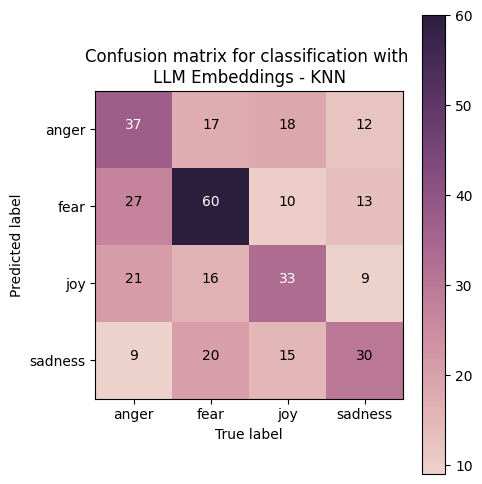

In [96]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [97]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [98]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [99]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [100]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [101]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [102]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [103]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3835 - loss: 1.4198 - val_accuracy: 0.5504 - val_loss: 1.1103
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6111 - loss: 0.9068 - val_accuracy: 0.5303 - val_loss: 1.1016
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7072 - loss: 0.7545 - val_accuracy: 0.5360 - val_loss: 1.1542
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7868 - loss: 0.5729 - val_accuracy: 0.5937 - val_loss: 1.1669
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8235 - loss: 0.4518 - val_accuracy: 0.5937 - val_loss: 1.1789
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8679 - loss: 0.3691 - val_accuracy: 0.5965 - val_loss: 1.2425
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8797 - loss: 0.3224 - val_accuracy: 0.5533 - val_loss: 1.3988
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9103 - loss: 0.2671 - val_accuracy: 0.

In [105]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[9.6670657e-01, 3.6593652e-03, 2.8208737e-05, 2.9605843e-02],
       [6.2850386e-02, 1.1471726e-02, 9.0556687e-01, 2.0111034e-02],
       [1.6633618e-01, 1.3930118e-03, 2.8620342e-08, 8.3227086e-01],
       [2.1461382e-07, 9.9991786e-01, 2.3007836e-08, 8.1834907e-05],
       [2.3689421e-03, 9.9761021e-01, 3.4635161e-07, 2.0405478e-05]],
      dtype=float32)

In [106]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'sadness', 'fear', 'fear'], dtype=object)

In [107]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [108]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.453363  1.226214      0.550432  1.110272
1       1  0.623858  0.885718      0.530259  1.101645
2       2  0.707169  0.739168      0.536023  1.154152
3       3  0.769997  0.590557      0.593660  1.166902
4       4  0.812621  0.485357      0.593660  1.178889
5       5  0.854138  0.401292      0.596542  1.242550
6       6  0.876003  0.328260      0.553314  1.398793
7       7  0.900083  0.276799      0.564842  1.573760
8       8  0.911431  0.249211      0.570605  1.655945
9       9  0.927207  0.195978      0.587896  1.686534
10     10  0.939939  0.164709      0.582133  1.772558
11     11  0.953224  0.138370      0.599424  1.849511
12     12  0.956823  0.128784      0.547550  2.024714
13     13  0.963465  0.109973      0.579251  2.009504
14     14  0.941877  0.158070      0.564842  2.181945
15     15  0.952117  0.141340      0.585014  2.125976
16     16  0.962081  0.109284      0.570605  2.052593
17     17  0.968171  0.097037      0.553314  2.213022
18     18  0.970662  0.088948      0.564842  2.305365
19     19  0.962635  0.102742      0.556196  2.346738
20     20  0.973429  0.077191      0.544669  2.783078
21     21  0.970385  0.077306      0.556196  2.565939
22     22  0.974536  0.075114      0.553314  2.518340
23     23  0.975644  0.068922      0.587896  2.554118
24     24  0.974260  0.065625      0.570605  2.540260

In [109]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.48      0.52        84
        fear       0.61      0.67      0.64       110
         joy       0.66      0.57      0.61        79
     sadness       0.44      0.53      0.48        74

    accuracy                           0.57       347
   macro avg       0.57      0.56      0.56       347
weighted avg       0.58      0.57      0.57       347



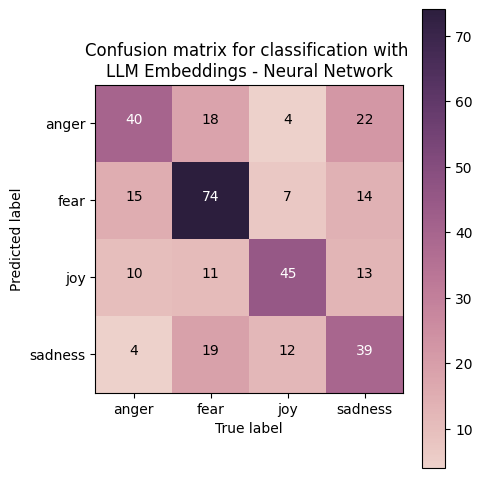

In [110]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

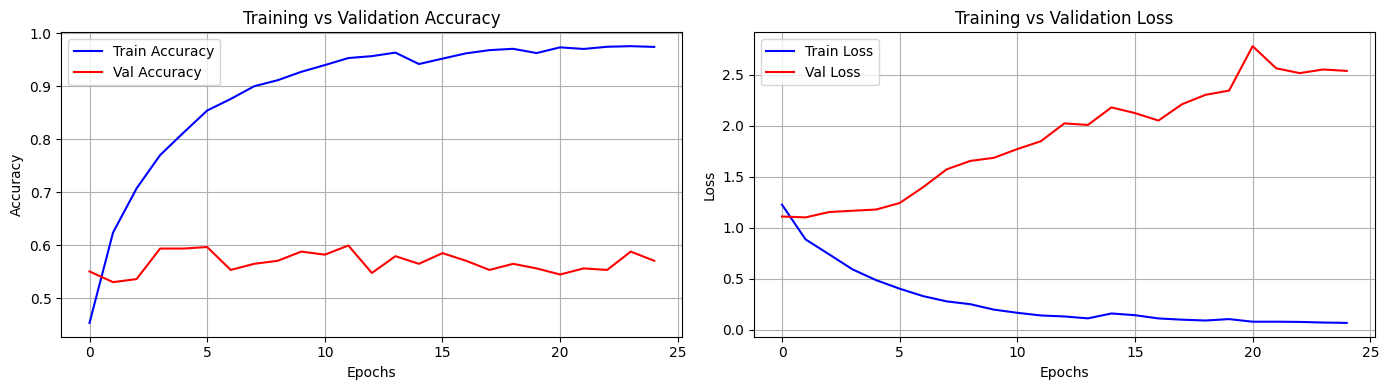

In [111]:
# Answer here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))  # Create 1 row, 2 columns

# Plot Accuracy
ax1.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training vs Validation Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(training_log['epoch'], training_log['loss'], label='Train Loss', color='blue')
ax2.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss', color='red')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training vs Validation Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout() 
plt.show()

#### # Answer here
Both KNN and Neural Network models demonstrated reasonable performance in classifying emotions using LLM embeddings. While KNN offers simplicity and effectiveness for linear decision boundaries, Neural Networks provide flexibility for handling complex, non-linear relationships. However, Neural Networks are susceptible to overfitting, particularly with limited data.

In this experiment, we observed a significant discrepancy between high training accuracy and low validation accuracy, suggesting that the model may be memorizing the training data rather than learning generalizable patterns. This indicates that the LLM embeddings alone may not be sufficient to improve the performance of our emotion classification models.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [112]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: i cannot classify this text, but i can tell you that it does not seem to be written in english. is there anything else i can help you with?. Asking for reclassification.
Invalid response: i cannot provide an emotion classification for that text. is there anything else i can help you with?. Asking for reclassification.
Invalid response: i cannot classify a message that contains the phrase "t5ylw ansh a79l shy 7lw mn wayed nas fe whatsapp". is there anything else i can help you with?. Asking for reclassification.
Invalid response: i can’t classify that text for you. is there anything else i can help you with?. Asking for r

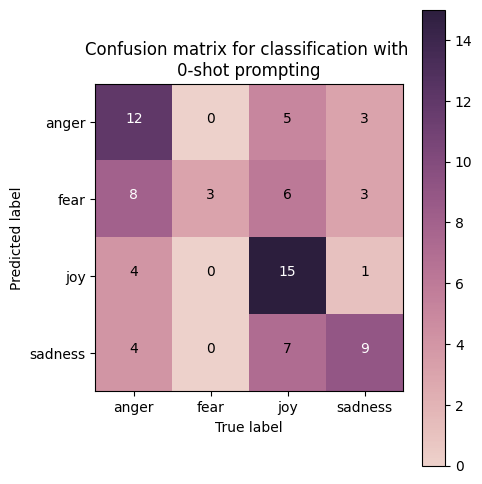

In [113]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Petition for non-Maghrebi PoC to stop buying 'couscous' from white grocery stores and boiling it. That is not couscous, that is trash.
Emotion: anger

Text: @_jamiebraidwood haha, horrific is all that needs to be said. Glad I'm away to Spain on Sat so missing game 🍹🍕🍺☉☉
Emotion: fear

Text: @ChrisBooker @ThePerezHilton On PHP54  and though the Kardashian stuff goes over my head, you're both hilarious, like gleeful little boys 😂😂
Emotion: joy

Text: Learning to trust God can quiet a troubled &amp; restless heart, bring peace to a weary soul, &amp; eliminate the hopelessness that #addiction is!
Emotion: sadness


Invalid res

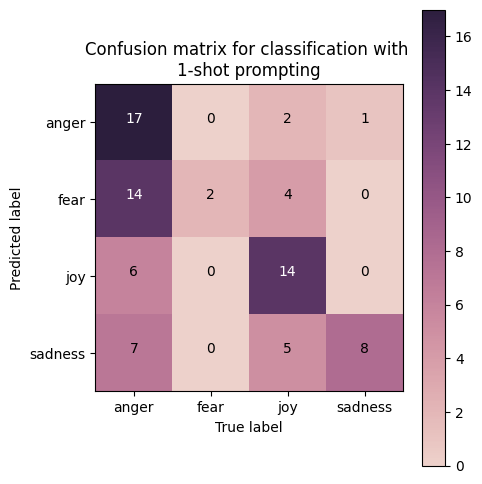

In [114]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Petition for non-Maghrebi PoC to stop buying 'couscous' from white grocery stores and boiling it. That is not couscous, that is trash.
Emotion: anger

Text: Like if you aggravate me constantly, byeeeeeeee
Emotion: anger

Text: one month til someone's bday and i think it's time to flaunt that I got them something pretty awesome 
Emotion: anger

Text: I just don't understand why everyone is so #angry we all just want to live and thrive don't we?
Emotion: anger

Text: @Lesdoggg take me with you!! JK. Have fun, relax, get a massage or two and chill. Don't eat the cucumbers, most places frown on that.
Emotion: anger

Text: @_ja

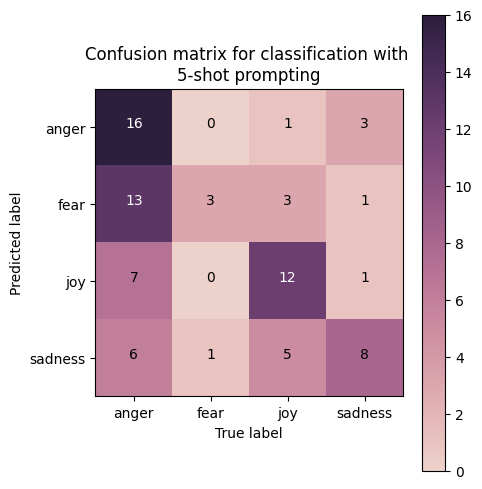

In [115]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

#### #Answer here
zero-shot:
- Accuracy: 48.75%
- The model struggled to accurately classify the emotions, often returning invalid responses like "anxiety" when asked to classify the text.

1-shot:
- Accuracy: 51.25%
- The model performed slightly better than 0-shot, with improved precision and recall for the "anger" and "sadness" classes. However, it still struggled with the "fear" class.

5-shot:
- Accuracy: 48.75%
- Surprisingly, the 5-shot performance was similar to the 0-shot, with lower precision and recall compared to the 1-shot model. The additional training examples did not seem to improve the model's overall classification accuracy.

In summary, the 1-shot model performed the best, with a 51.25% accuracy rate. The 0-shot and 5-shot models had similar lower accuracy around 48-49%. The 1-shot model seemed to strike the right balance of learning from a few examples without overfitting. The 5-shot model may have suffered from trying to learn too many examples without sufficient capacity.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---